# EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing libraries related to NLTK, vectorizers and string processing
import nltk
import string
nltk.download("all")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# other miscellaneous libraries used while preparing data for testing and evaluation
from collections import Counter
import re
from sys import maxsize
import random
import timeit
import datetime
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pickle5
import pickle5 as pickle
# with open('drive/MyDrive/Colab Notebooks/DF_new.pkl', 'rb') as f:
#   x = pickle.load(f)
# file_name="df_final_category.pkl"
file_name="DF_new.pkl"
PATH='/content/drive/MyDrive/Colab Notebooks'
f=open(PATH+'/DF_new.pkl', 'rb')
x = pickle.load(f)

     |████████████████████████████████| 132 kB 7.7 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219346 sha256=52b08f3c037407f8a306bbf08cef4f2d402ad3baae77e600b2d0a22905b2643a
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


In [ ]:
x.sample(10)

,Descriptions,manufacturer_name,manufacturer_number,Category
1571240,shcslowxalloy steelpk,THE SOCKET SOURCE,1AYP7,Fasteners
523748,flap disctype dia grit,"SAINT-GOBAIN ABRASIVES, INC.",05539564060,Abrasives
1876728,ballpoint pensblackpk,ESSENDANT CO--ACCT #959035,PIL32220,Office Supplies
860189,ledge kit gagray in w in d,EDSAL MANUFACTURING COMPANY,242,Material Handling
1156773,vam top box,NON STANDARD PART,None,Machining
1029484,mechanical power transmission,JET TOOLS,TS-1551071,Mechanical Power Transmission
914068,gage block in lrectangular,MITUTOYO AMERICA CORP.,611160-521,Machining
2049778,xphlrndscrwdr,Armstrong Industrial Hand Tools,66-158,Tools
325535,nema premium general purpose motor,WEG ELECTRIC CORP,00718ET3E213T-W22,Electrical Power Transmission
1754946,impact socket in dr in pt,WRIGHT TOOL COMPANY,8817,Tools


In [ ]:
len(x.Category.unique())

57

In [ ]:
print(x.isna().sum())

Descriptions               0
manufacturer_name        693
manufacturer_number    56167
Category                   0
dtype: int64


In [ ]:
newdf = x.copy()

In [ ]:
newdf['Combined Description'] = newdf['Descriptions'] + " " + newdf['manufacturer_name'] + " " + newdf['manufacturer_number']

In [ ]:
newdf

,Descriptions,manufacturer_name,manufacturer_number,Category,Combined Description
0,wire thhn stranded brown,OMNI CABLE,THNX105,Wire & Cable,wire thhn stranded brown OMNI CABLE THNX105
2,wire thhn green reel only,GENERIC WIRE,THHN-6-STR-GRN-CUT REEL,Wire & Cable,wire thhn green reel only GENERIC WIRE THHN-6...
3,wire black thhn,GENERIC WIRE,THHN-6-STR-BLK-CUT REEL,Wire & Cable,wire black thhn GENERIC WIRE THHN-6-STR-BLK-C...
12,cipec tube x npt branch y,NRG,C24880428,Fluid Power,cipec tube x npt branch y NRG C24880428
17,aro mounting bracket aro,ARO,29668,Fluid Power,aro mounting bracket aro ARO 29668
...,...,...,...,...,...
2090447,x hcs ss,Fastenal Approved Vendor,400131,Fasteners,x hcs ss Fastenal Approved Vendor 400131
2090448,mxmmz shcs,Fastenal Approved Vendor,-,Fasteners,mxmmz shcs Fastenal Approved Vendor -
2090449,cheeseslms x z,Fastenal Approved Vendor,-,Fasteners,cheeseslms x z Fastenal Approved Vendor -
2090450,m flat washer a,Fastenal Approved Vendor,-,Fasteners,m flat washer a Fastenal Approved Vendor -


In [ ]:
newdf = newdf.drop_duplicates(["Combined Description"],keep='first', inplace=False, ignore_index=True)

In [ ]:
newdf

,Descriptions,manufacturer_name,manufacturer_number,Category,Combined Description
0,wire thhn stranded brown,OMNI CABLE,THNX105,Wire & Cable,wire thhn stranded brown OMNI CABLE THNX105
1,wire thhn green reel only,GENERIC WIRE,THHN-6-STR-GRN-CUT REEL,Wire & Cable,wire thhn green reel only GENERIC WIRE THHN-6...
2,wire black thhn,GENERIC WIRE,THHN-6-STR-BLK-CUT REEL,Wire & Cable,wire black thhn GENERIC WIRE THHN-6-STR-BLK-C...
3,cipec tube x npt branch y,NRG,C24880428,Fluid Power,cipec tube x npt branch y NRG C24880428
4,aro mounting bracket aro,ARO,29668,Fluid Power,aro mounting bracket aro ARO 29668
...,...,...,...,...,...
1308438,levergreasegunwhose,ALEMITE CORP.,500-E,Hydraulics And Pneumatics,levergreasegunwhose ALEMITE CORP. 500-E
1308439,shcs x zb,Fastenal Approved Vendor,11587834,Fasteners,shcs x zb Fastenal Approved Vendor 11587834
1308440,fhn silbrz,Fastenal Approved Vendor,-,Fasteners,fhn silbrz Fastenal Approved Vendor -
1308441,po flng nut,Fastenal Approved Vendor,-,Fasteners,po flng nut Fastenal Approved Vendor -


In [ ]:
products = newdf

In [ ]:
products = products.reset_index(drop=True)

In [ ]:
products.sample(10)['Combined Description'].values

array(['pipe sealantmltubemediumwhite 3M ADHESIVES (IATD) PS65-50',
       'washguard cface ac motor LEESON ELETRIC MOTOR 119480',
       'batteryvdcah faston HUBBELL LIGHTING CO, INC. 120922',
       'connectorzinc steelcompxminxin PARKER- TUBE FITTING DIVISION 10 FBU-S',
       ' x  x  atz type  slicer cutting wheel METABO 655331000',
       ' AUTOMATIC SWITCH CO. JSP8316G066AC120/60D',
       'flgd fork terminal PANDUIT CORP PN18-8FF-C',
       'crown tooth gear coupling FALK 1040G HUB RB',
       'fluor starter w SYLVANIA FS-2',
       'rigid rule inr graduations GRAINGER GLOBAL SOURCING - TOOLS 2YNG3'],
      dtype=object)

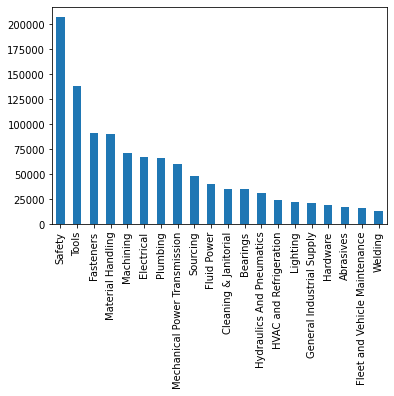

In [ ]:
fig, ax = plt.subplots()

top_categories = products['Category'].value_counts()


# products['Category'].value_counts().plot(ax=ax, kind='bar')
top_categories[:20].plot(ax=ax, kind='bar')

# Most Common Words

In [ ]:
from gensim import utils
import gensim.parsing.preprocessing as gsp
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Many of the descriptions have information like numbers, units of measure etc. which we will remove
filters = [
    gsp.strip_tags,
    gsp.strip_punctuation,
    gsp.strip_multiple_whitespaces,
    gsp.strip_numeric,
    gsp.remove_stopwords,
    gsp.strip_short,
]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [ ]:
# Let's clean all the product descriptions using the functions defined above and join the them into 1 large sentence
words = list(products['Descriptions'].values)
products['clean_text'] = products['Descriptions'].apply(lambda x: clean_text(str(x)))
text = " ".join(each for each in products['clean_text'])

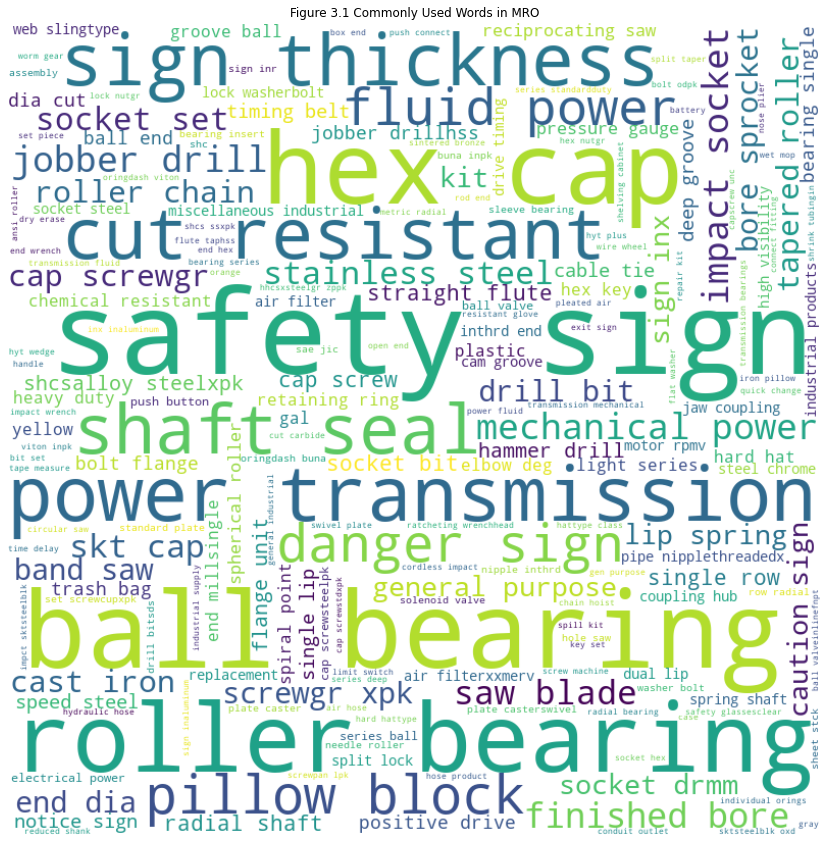

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["pk100","white","black","blue","red","brown","size","green", "grainger", "global","sourcing", "grainger approved", "dba accuform"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=800,height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Figure 3.1 Commonly Used Words in MRO')
plt.show()

In [ ]:
products

,Descriptions,manufacturer_name,manufacturer_number,Category,Combined Description,clean_text
0,wire thhn stranded brown,OMNI CABLE,THNX105,Wire & Cable,wire thhn stranded brown OMNI CABLE THNX105,wire thhn stranded brown
1,wire thhn green reel only,GENERIC WIRE,THHN-6-STR-GRN-CUT REEL,Wire & Cable,wire thhn green reel only GENERIC WIRE THHN-6...,wire thhn green reel
2,wire black thhn,GENERIC WIRE,THHN-6-STR-BLK-CUT REEL,Wire & Cable,wire black thhn GENERIC WIRE THHN-6-STR-BLK-C...,wire black thhn
3,cipec tube x npt branch y,NRG,C24880428,Fluid Power,cipec tube x npt branch y NRG C24880428,cipec tube npt branch
4,aro mounting bracket aro,ARO,29668,Fluid Power,aro mounting bracket aro ARO 29668,aro mounting bracket aro
...,...,...,...,...,...,...
1308438,levergreasegunwhose,ALEMITE CORP.,500-E,Hydraulics And Pneumatics,levergreasegunwhose ALEMITE CORP. 500-E,levergreasegunwhose
1308439,shcs x zb,Fastenal Approved Vendor,11587834,Fasteners,shcs x zb Fastenal Approved Vendor 11587834,shcs
1308440,fhn silbrz,Fastenal Approved Vendor,-,Fasteners,fhn silbrz Fastenal Approved Vendor -,fhn silbrz
1308441,po flng nut,Fastenal Approved Vendor,-,Fasteners,po flng nut Fastenal Approved Vendor -,flng nut


# Deep Learning Model

In [ ]:

!pip install transformers
!pip install simpletransformers
!pip install tensorboardx
!pip install pytorch-nlp

     |████████████████████████████████| 2.6 MB 4.4 MB/s 
     |████████████████████████████████| 895 kB 38.0 MB/s 
     |████████████████████████████████| 636 kB 34.2 MB/s 
     |████████████████████████████████| 3.3 MB 37.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 221 kB 4.2 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 1.2 MB 38.3 MB/s 
     |████████████████████████████████| 1.7 MB 27.3 MB/s 
     |████████████████████████████████| 124 kB 51.2 MB/s 
     |████████████████████████████████| 264 kB 52.9 MB/s 
     |████████████████████████████████| 8.0 MB 52.2 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
     |████████████████████████████████| 133 kB 45.9 MB/s 
     |████████████████████████████████| 170 kB 40.1 MB/s 
     |████████████████████████████████| 63 kB

     |████████████████████████████████| 90 kB 3.4 MB/s 


In [ ]:
# importing the libraries involved in matrix operations and dataframe handling 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing libraries related to NLTK, vectorizers and string processing
import nltk
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# other miscellaneous libraries used while preparing data for testing and evaluation
from collections import Counter
import re
from sys import maxsize
import random
import timeit
import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch

# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
#splitting the dataframe into test and training dataframe

balanced_df, test_df = train_test_split(products, test_size=0.1, random_state = 2018)
print(balanced_df.shape, test_df.shape)

NameError: ignored

In [ ]:
balanced_df

In [ ]:
encoder = LabelEncoder()
balanced_df['categories']=encoder.fit_transform(balanced_df['Category'])
print(Counter(balanced_df['categories']))

prediction_decoded = encoder.inverse_transform(balanced_df['categories'])
print(Counter(prediction_decoded))

In [ ]:
#loading the BERT tokenizer
from transformers import BertTokenizer
import tqdm

print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
desc = balanced_df["clean_text"].tolist()

seq_len = [len(i.split()) for i in desc]
pd.Series(seq_len).hist(bins = 30)

In [ ]:
#tokenization of all the sentences followed by the mapping of the tokens to their word ids
tokenized_inputs = []
tokenized_len = []
input_data = balanced_df["clean_text"].tolist()

for sentence in input_data:
  '''
    tokenizer.encode does the following:
    1. tokenizes the sentences
    2. adds [CLS] to the start of the tokens and [SEP] to the end of the tokens
    3. Maps the tokens to their word IDS
  '''
  encoded_sentence = tokenizer.encode(sentence, add_special_tokens=True)
  tokenized_inputs.append(encoded_sentence)
  tokenized_len.append(len(encoded_sentence))

balanced_df["Token_ids"] = tokenized_inputs

In [ ]:

sns.distplot(tokenized_len)
plt.xlabel('Token count');

In [ ]:
# from the above, we can see that most of the sentences are below 200 -> choosing a max_len of 128
max_len = 64
#padding and truncating the sentences according to the maximum length
tokenized_inputs = pad_sequences(balanced_df["Token_ids"], maxlen=max_len, dtype="long",value=0, truncating="post", padding="post")

#creating the attention masks
attention_mask = []

for sentence in tokenized_inputs:
  temp_mask = [int(token_id>0) for token_id in sentence]
  attention_mask.append(temp_mask)

In [ ]:
description_inputs = torch.tensor(tokenized_inputs)
category_labels = torch.tensor(balanced_df["categories"].values)
mask = torch.tensor(attention_mask)

print(description_inputs.shape, category_labels.shape, mask.shape)

#splitting the dataset and attention masks
training_dataset, validation_dataset, training_categories, validation_categories = train_test_split(description_inputs, 
                                                                                                    category_labels, 
                                                                                                    random_state = 44, 
                                                                                                    test_size = 0.15,
                                                                                                    shuffle=True)

training_mask, validation_mask, _, _ = train_test_split(mask, 
                                                        category_labels, 
                                                        random_state = 44, 
                                                        test_size = 0.15,
                                                        shuffle=True)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#batch size has been chosen to be 16 as a batch size of 32 gave out of memory errors (limitation)
BATCH_SIZE = 16

# creating the dataloader for the training dataset
training_data = TensorDataset(training_dataset, training_mask, training_categories)
training_dataloader = DataLoader(training_data, sampler=RandomSampler(training_data), batch_size=BATCH_SIZE)

# creating the dataloader for the validation dataset
validation_data = TensorDataset(validation_dataset, validation_mask, validation_categories)
validation_dataloader = DataLoader(validation_data, sampler=SequentialSampler(validation_data), batch_size=BATCH_SIZE)

In [ ]:
len(products['Category'].unique())

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup

# choosing the model version that has only lowercase characters and is the smaller one out the two versions
option_name = "bert-base-uncased"

model = BertForSequenceClassification.from_pretrained(option_name, 
                                                      num_labels = 57, 
                                                      output_attentions = False, 
                                                      output_hidden_states = False)
model.cuda()

#optimzer: object that actually performs updates to our weights
optimizer = AdamW(model.parameters(),
                  lr = 3e-5,
                  # lr = 0.05, 
                  eps = 1e-8)

# number of training epochs
epochs = 10

In [ ]:

#HELPER FUNCTIONS

# this function takes time in seconds and returns a string hh:mm:ss
def format_time(elapsed):
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

# this function calculates the accuracy by taking in the predicted and actual labels as parameters
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
# ************ TRAINING LOOP ************************

def train_model(model = model,
                optimizer = optimizer,
                train_loader = training_dataloader,
                valid_loader = validation_dataloader,
                num_epochs = epochs,
                eval_every = len(training_dataloader) // 4):
  
  seed_val = 44

  random.seed(seed_val)
  np.random.seed(seed_val)
  torch.manual_seed(seed_val)
  torch.cuda.manual_seed_all(seed_val)

  #initialising the running variables
  train_loss_list = []
  valid_loss_list = []
  running_loss = 0.0
  valid_loss = 0.0

  for each_epoch in range(num_epochs):

    '''
    ****************** TRAINING *******************
    '''

    #performing one full pass of the training set
    print('\n')
    print("*************** Epoch {:}/{:} ***************".format(each_epoch+1,epochs))
    print("Training....")

    #calculating how much running time each epoch takes
    start = timeit.default_timer()
    #resetting the running loss variable
    running_loss = 0.0

    #putting the model into training mode
    model.train()

    for step, (input_desc_ids, input_mask, input_label) in enumerate(train_loader):

      #evaluation of each batch 
      if step%eval_every==0 and step!=0:
        stop = timeit.default_timer()
        #calculating the time elapsed in hh:mm:ss format
        time_elapsed = format_time(stop-start)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_loader), time_elapsed))

      # unpacking the training batch from the data loader and copying the Pytoch tensors to the GPU
      input_desc_ids = input_desc_ids.to(device)
      input_mask = input_mask.to(device)
      input_label = input_label.to(device)
      # print(input_label)
      
      #clearing the previously calculated gradients before performing a backward pass
      model.zero_grad()

      #performing a forward pass on this particular batch of data
      outputs = model(input_desc_ids,
                      token_type_ids=None,
                      attention_mask = input_mask,
                      labels = input_label)
      # print(outputs)

      loss = outputs[0]
      running_loss += loss.item()

      #performing a backward pass to calculate the gradients
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

      #updating the parameters 
      optimizer.step()

    # calculating the average training loss and storing it
    average_train_loss = running_loss / len(train_loader)
    train_loss_list.append(average_train_loss)

    print('\n')
    print("  Average training loss: {0:.2f}".format(average_train_loss))
    print("  Training epoch took: {:}".format(format_time(timeit.default_timer() - start)))


    '''
    ****************** VALIDATION *******************
    '''

    print("\n")
    print("Validating....")

    start = timeit.default_timer()

    model.eval()

    #initialising the tracking variables
    valid_loss = 0.0
    valid_accuracy = 0.0
    steps_eval = 0
    examples_eval = 0

    for (input_ids, input_masks, input_labels) in valid_loader:
      input_ids = input_ids.to(device)
      input_masks = input_masks.to(device)
      input_labels = input_labels.to(device)

      # saves computing requirements by setting requires_grad to False
      with torch.no_grad():
        outputs = model(input_ids, 
                        token_type_ids=None, 
                        attention_mask=input_masks)
      
      logits = outputs[0]

      logits = logits.detach().cpu().numpy()
      label_ids = input_labels.to('cpu').numpy()

      temp_accuracy = flat_accuracy(logits, label_ids)
      valid_accuracy += temp_accuracy
      steps_eval += 1

    average_valid_accuracy = valid_accuracy/steps_eval
    valid_loss_list.append(average_valid_accuracy)

    print("  Accuracy: {0:.2f}".format(average_valid_accuracy))
    print("  Validation took: {:}".format(format_time(timeit.default_timer() - start)))

  return train_loss_list, valid_loss_list

  print("\n")
  print("Training complete!!!")

In [ ]:
train_loss_list, valid_loss_list = train_model()

In [ ]:
torch.save(model.state_dict(), 'drive/MyDrive/Colab Notebooks/model(8-25-21).pth')

In [ ]:
plt.plot(valid_loss_list)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [ ]:
plt.plot(train_loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")